
**Installing Packages**

In [1]:
pip install pytextrank

In [2]:
pip install textblob

In [3]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Importing Modules**

In [6]:
# Data manipulation and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# Text processing and NLP
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning models and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [7]:
# Load the dataset
data = pd.read_csv('/content/Samsung Galaxy M11 (Black, 32 GB) Reviews.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    494 non-null    float64
 1   Review    570 non-null    object 
 2   Comments  570 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.5+ KB


In [9]:
data.head()

,Rating,Review,Comments
0,4.0,Good choice,Great mobile very handy and cool look.Positive...
1,5.0,Fabulous! SAMSUNG GALAXY M11,"Very nice phone, fast and safely delivered, pa..."
2,5.0,Terrific purchase,It's an excellent product for normal use and f...
3,4.0,Worth the money,Multimedia experience on this device is reall...
4,5.0,Just wow!,Very nice phone. rear camera is awesome but fr...


**Data Visualization**

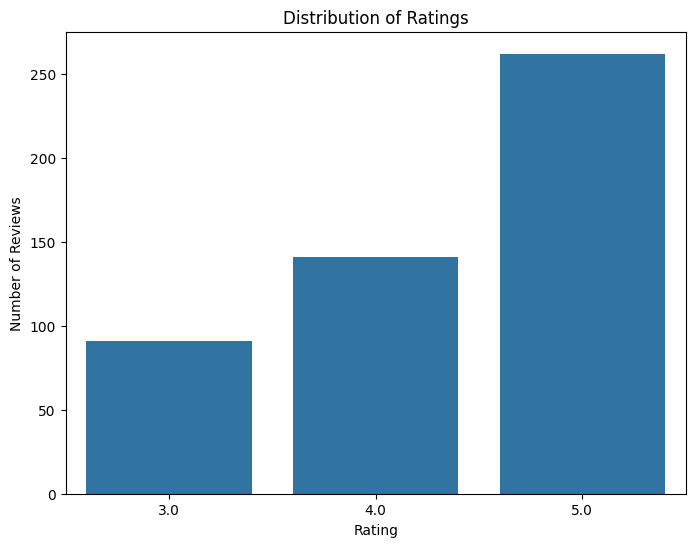

In [10]:
#Rating Count Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

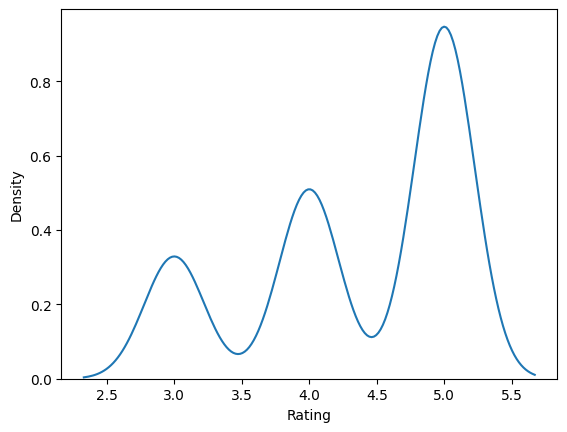

In [11]:
sns.kdeplot(data=data, x="Rating")
plt.show()

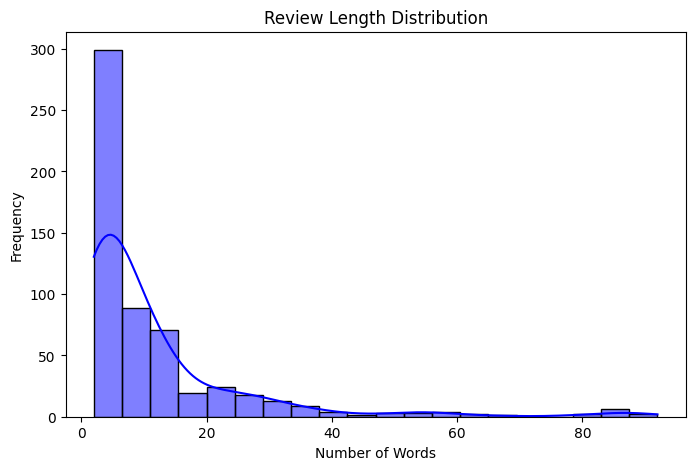

In [12]:
#Review or comments Frequency vs No of words
data['Review_Length'] = data['Comments'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['Review_Length'], bins=20, kde=True, color='blue')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-7139906b37b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Review_Length', data=data, palette='coolwarm')


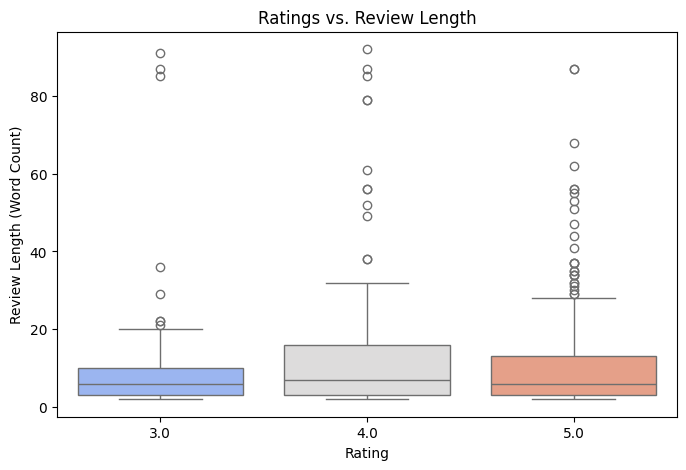

In [13]:
# Ratings vs. Review Length
plt.figure(figsize=(8, 5))
sns.boxplot(x='Rating', y='Review_Length', data=data, palette='coolwarm')
plt.title('Ratings vs. Review Length')
plt.xlabel('Rating')
plt.ylabel('Review Length (Word Count)')
plt.show()

**Data Cleaning**

In [14]:
data.isnull().sum()

,0
Rating,76
Review,0
Comments,0
Review_Length,0


In [15]:
data['Rating']=data['Rating'].fillna(data['Rating'].mean())

In [16]:
def preprocess_comment(comment):
    comment = re.sub(r'[^\w\s]', '', comment)  # Remove special characters
    comment = comment.lower().strip()  # Convert to lowercase
    return comment

data['Comments'] = data['Comments'].apply(preprocess_comment)
data['Review'] = data['Review'].apply(preprocess_comment)

In [17]:
data['Full_Text'] = data['Review'] + " " + data['Comments']

**Summary Of All Reviews**

In [18]:
# Step1 : Summary of Reviews

import spacy

nlp = spacy.load("en_core_web_lg")

def summarize_text(text, limit=5):
  doc = nlp(text)
  sentences = list(doc.sents)
  selected_sentences = []

  for sentence in sentences:
    score = 0
    for token in sentence:
        score += token.dep_ == "ROOT" or token.dep_ == "nsubj"
    selected_sentences.append((sentence, score))

  selected_sentences.sort(key=lambda x: x[1], reverse=True)

  summary = ""
  for sentence, _ in selected_sentences[:limit]:
    summary += str(sentence) + " "+"\n"

  return summary.strip()


summary = summarize_text(" ".join(data['Full_Text']))
print(summary)

more brilliant slightly slow go for 4gb version phone is goodread more terrible product u cheated meu took yr phone and my money alsoread more worthless mic is not working in handfree moderead more worst experience ever bakwas product dont buyno noread more worth every penny its very good phone and tq flipkart read more awesome it is nice phone for one year after one year its start hangread more excellent fnice picread more very poor camera quality  so poorread more dont waste your money not goodread more must buy very good mobile and flipkart qualityread more classy product amazing phone superfast delivery decent camera superior processor good for gaming alsoread more decent product nice product as brand of sumsung but their are something wrong with me in website show the 15v fast charger and give me 9v fast charger this is not goodread more good choice better take the 4gb ram varient camera could have been better battery is awesome so is screen remember the fingerprint sensor is a bi

**Sentiment Analysis**

In [19]:
def classify_sentiment(text):

    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0.2:
        return "Positive"

    elif analysis.sentiment.polarity < -0.2:
        return "Negative"

    else:
        return "Neutral"

data['Sentiment'] = data['Full_Text'].apply(classify_sentiment)

<ipython-input-20-2d174b99f1a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


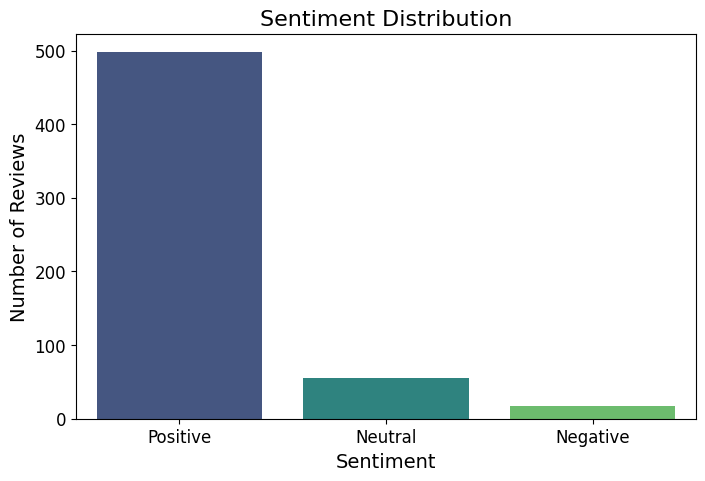

In [20]:
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Calculate Sentiment Score-Based comments**

In [22]:
def calculate_sentiment_score(comment):

    blob = TextBlob(comment)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0.5:
        return 5
    elif sentiment_score > 0.2:
        return 4
    elif sentiment_score > -0.2:
        return 3
    elif sentiment_score > -0.5:
        return 2
    else:
        return 1

data['SentimentRating'] = data['Full_Text'].apply(calculate_sentiment_score)

**Calculate Overall Rating from Comments**

In [23]:
def calculate_overall_rating(sentiment_ratings):

    return round(sentiment_ratings.mean(),2)


overall_rating = calculate_overall_rating(data['SentimentRating'])
print("Overall Sentiment-Based Rating:", overall_rating)

Overall Sentiment-Based Rating: 4.3


**Product Prediction**

In [28]:
# Step 4: Predict Good/Okay/Bad based on Sentiment Rating
def predict_rating_category(rating):
    if rating >= 4:
        return "Good"
    elif 2 <= rating < 4:
        return "Okay"
    else:
        return "Bad"

product_category = predict_rating_category(overall_rating)
print("Product Category (Sentiment-Based):", product_category)

Product Category (Sentiment-Based): Good


In [42]:
# Calculate the accuracy
accuracy = accuracy_score(data['Rating'],data['SentimentRating'])
print("Accuracy:", accuracy)

Accuracy: 0.38421052631578945


**Product Analysis**

In [33]:
print(summary)
print()
print("Overall Sentiment-Based Rating:", overall_rating)
print()
print("Product Category (Sentiment-Based):", product_category)

more brilliant slightly slow go for 4gb version phone is goodread more terrible product u cheated meu took yr phone and my money alsoread more worthless mic is not working in handfree moderead more worst experience ever bakwas product dont buyno noread more worth every penny its very good phone and tq flipkart read more awesome it is nice phone for one year after one year its start hangread more excellent fnice picread more very poor camera quality  so poorread more dont waste your money not goodread more must buy very good mobile and flipkart qualityread more classy product amazing phone superfast delivery decent camera superior processor good for gaming alsoread more decent product nice product as brand of sumsung but their are something wrong with me in website show the 15v fast charger and give me 9v fast charger this is not goodread more good choice better take the 4gb ram varient camera could have been better battery is awesome so is screen remember the fingerprint sensor is a bi